# Курсовая работа. Блок ML Beginner
<br>

**NB!** Код должен быть с комментариями к каждому логическому блоку кода. В противном случае работа **не** будет принята. <br><br>
Выполнение курсовой работы может потребовать использование дополнительных библиотек. Может потребоваться предварительная обработка данных.

<br><br>
**Описание работы:**
&nbsp;&nbsp;&nbsp;&nbsp;
<br><br>
&nbsp;&nbsp;&nbsp;&nbsp; Любой бизнес хочет максимизировать количество клиентов. Для достижения этой цели важно не только пытаться привлечь новых, но и удерживать уже существующих. Удержать клиента обойдется компании дешевле, чем привлечь нового. Кроме того, новый клиент может оказаться слабо заинтересованным в услугах бизнеса и с ним будет сложно работать, тогда как о старых клиентах уже есть необходимые данные по взаимодействию с сервисом. 
 <br>

&nbsp;&nbsp;&nbsp;&nbsp; Соответственно, прогнозируя отток, мы можем вовремя среагировать и попытаться удержать клиента, который хочет уйти. Опираясь на данные об услугах, которыми пользуется клиент, мы можем сделать ему специальное предложение, пытаясь изменить его решение об уходе от оператора. Благодаря этому задача удержания будет легче в реализации, чем задача привлечения новых пользователей, о которых мы еще ничего не знаем.<br>

&nbsp;&nbsp;&nbsp;&nbsp; Вам предоставлен набор данных от телекоммуникационной компании. В данных содержится информация о почти шести тысячах пользователей, их демографических характеристиках, услугах, которыми они пользуются, длительности пользования услугами оператора, методе оплаты, размере оплаты. 
<br>

&nbsp;&nbsp;&nbsp;&nbsp; Cтоит задача проанализировать данные и спрогнозировать отток пользователей (выявить людей, которые продлят контракт и которые не продлят). Работа должна включать в себя следующие обязательные пункты: 
1. Описание данных *(с расчетом базовых статистик)*, 
2. Исследование зависимостей и формулирование гипотез, 
3. Построение моделей для прогнозирования оттока *(с обоснованием выбора той или иной модели)* на основе проверенных гипотез и выявленных взаимосвязей, 
4. Сравнение качества полученных моделей. 

Во втором разделе обязательно должно присутствовать обоснование гипотез, подробное описание выявленных взаимосвязей, а также их визуализация. 
<br>В четвертом дополнительно должны быть сформулированы общие выводы работы.

<br><br>

_________

[Codebook](#Codebook) <br>
[1. Описание данных](#1.-Описание-данных)<br>
[2. Исследование зависимостей и формулирование гипотез](#2.-Исследование-зависимостей-и-формулирование-гипотез)<br>
[3. Построение моделей для прогнозирования оттока](#3.-Построение-моделей-для-прогнозирования-оттока)<br>
[4. Сравнение качества моделей](#4.-Сравнение-качества-моделей) <br>


## Codebook
<br>

[Ссылка для скачивания данных](https://drive.google.com/open?id=1dPCG76ST6NohYKtVMGv6HpFL-jD5p1eJ) 
<br><br>

`telecom_users.csv` содержит следующие значения:<br><br>

&nbsp;&nbsp;&nbsp;&nbsp; `customerID` – id клиента<br>
&nbsp;&nbsp;&nbsp;&nbsp; `gender` – пол клиента (male/female)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `SeniorCitizen` – яляется ли клиент пенсионером (1, 0)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Partner` – состоит ли клиент в браке (Yes, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Dependents` – есть ли у клиента иждивенцы (Yes, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `tenure` – сколько месяцев человек являлся клиентом компании<br>
&nbsp;&nbsp;&nbsp;&nbsp; `PhoneService` – подключена ли услуга телефонной связи (Yes, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `MultipleLines` – подключены ли несколько телефонных линий (Yes, No, No phone service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `InternetService` – интернет-провайдер клиента (DSL, Fiber optic, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `OnlineSecurity` – подключена ли услуга онлайн-безопасности (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `OnlineBackup` – подключена ли услуга online backup (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `DeviceProtection` – есть ли у клиента страховка оборудования (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `TechSupport` – подключена ли услуга технической поддержки (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `StreamingTV` – подключена ли услуга стримингового телевидения (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `StreamingMovies` – подключена ли услуга стримингового кинотеатра (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Contract` – тип контракта клиента (Month-to-month, One year, Two year)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `PaperlessBilling` – пользуется ли клиент безбумажным биллингом (Yes, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `PaymentMethod` – метод оплаты (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))<br>
&nbsp;&nbsp;&nbsp;&nbsp; `MonthlyCharges` – месячный размер оплаты на настоящий момент<br>
&nbsp;&nbsp;&nbsp;&nbsp; `TotalCharges` – общая сумма, которую клиент заплатил за услуги за все время<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Churn` – произошел ли отток (Yes or No)<br>

# 1. Описание данных

Импортируем библиотеки для чтения и визуализации данных

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('telecom_users.csv')

Смотрим с какими типами обьектов нам предстоит работать

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5986 entries, 0 to 5985
Data columns (total 22 columns):
Unnamed: 0          5986 non-null int64
customerID          5986 non-null object
gender              5986 non-null object
SeniorCitizen       5986 non-null int64
Partner             5986 non-null object
Dependents          5986 non-null object
tenure              5986 non-null int64
PhoneService        5986 non-null object
MultipleLines       5986 non-null object
InternetService     5986 non-null object
OnlineSecurity      5986 non-null object
OnlineBackup        5986 non-null object
DeviceProtection    5986 non-null object
TechSupport         5986 non-null object
StreamingTV         5986 non-null object
StreamingMovies     5986 non-null object
Contract            5986 non-null object
PaperlessBilling    5986 non-null object
PaymentMethod       5986 non-null object
MonthlyCharges      5986 non-null float64
TotalCharges        5986 non-null object
Churn               5986 non-null 

Проверяем наличие пустых ячеек

In [4]:
df.isnull().sum()

Unnamed: 0          0
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [5]:
df.head()

,Unnamed: 0,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1869,7010-BRBUU,Male,0,Yes,Yes,72,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.10,1734.65,No
1,4528,9688-YGXVR,Female,0,No,No,44,Yes,No,Fiber optic,...,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),88.15,3973.2,No
2,6344,9286-DOJGF,Female,1,Yes,No,38,Yes,Yes,Fiber optic,...,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),74.95,2869.85,Yes
3,6739,6994-KERXL,Male,0,No,No,4,Yes,No,DSL,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,55.90,238.5,No
4,432,2181-UAESM,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,Month-to-month,No,Electronic check,53.45,119.5,No


Посмотрим какую долю занимают "отточные" юзеры. Видно что пользователей оставшихся на платформе намного больше. Датасет не сбалансирован.

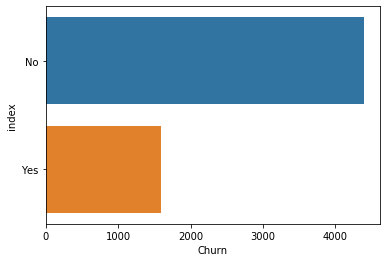

In [6]:
sns.barplot(y='index', x='Churn', data=df.Churn.value_counts().reset_index())

Посмотрим какую долю занимают пенсионеры.

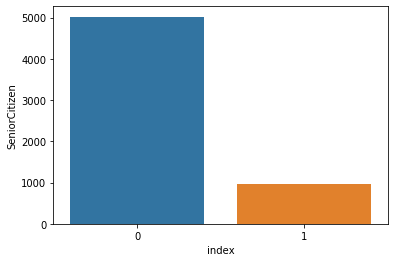

In [7]:
sns.barplot(x='index', y='SeniorCitizen', data=df.SeniorCitizen.value_counts().reset_index())

Посмотрим распределение юзеров по полам.

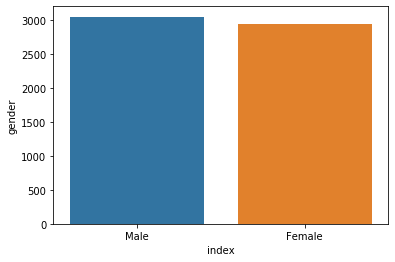

In [8]:
sns.barplot(x='index', y='gender', data=df.gender.value_counts().reset_index())

Посмотрим состоят ли клиенты в браке.

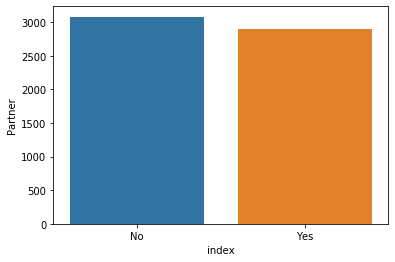

In [9]:
sns.barplot(x='index', y='Partner', data=df.Partner.value_counts().reset_index())

Посмотрим имеют ли юзеры иждивенцев.

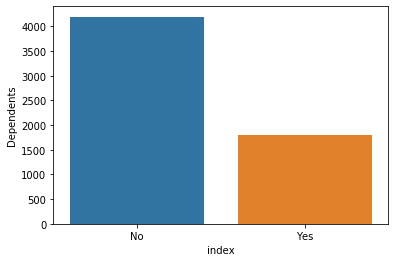

In [10]:
sns.barplot(x='index', y='Dependents', data=df.Dependents.value_counts().reset_index())

Посмотрим сколько месяцев люди являются клиентами компании.
Видно что очень много людей являются новыми клиентам, так же можно выделить прослойку "старых" клентов. Заметим странных клиетов с длительностью клиенства 0 месяцев.

Меданное значение 29.0


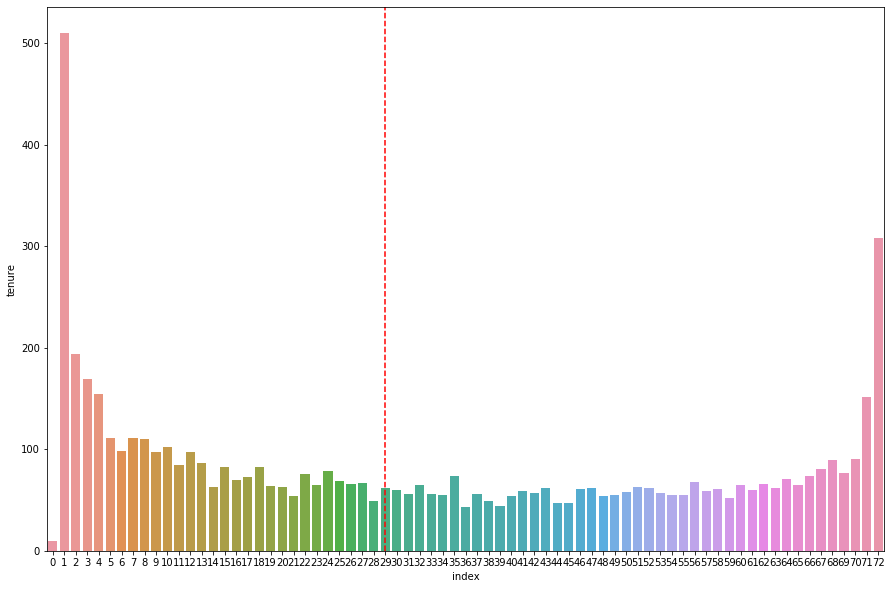

In [11]:
plt.figure(figsize=(15, 10))
sns.barplot(x='index', y='tenure', data=df.tenure.value_counts().reset_index())
plt.axvline(df.tenure.median(), color='r', linestyle='--')
print("Меданное значение",df.tenure.median())

Посмотрим наличие различных услуг у пользователей.
    Как можно заметить в основном у пользователей оформлены телефонные услуги с одной линией, но пользователей с несколькими линиями тоже не мало. Самый распространенный интернет-оператор Fiber Optic, услугами безопасности и OnlineBackup в основном не пользуются, как и DeviceProtection и TechSupport. Пользователей стриминговым ТВ и кинотеатром практически столько же сколько людей которые не пользуются данными сервисами среди интернет пользователей.

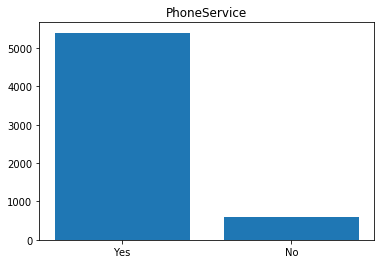

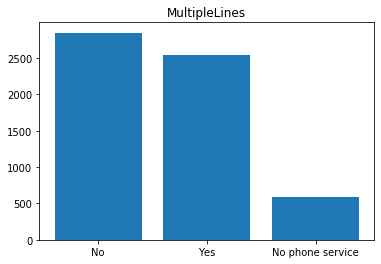

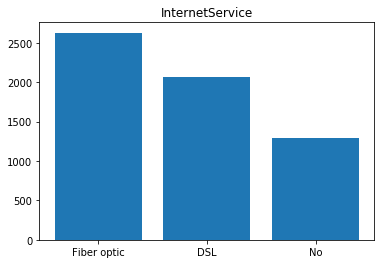

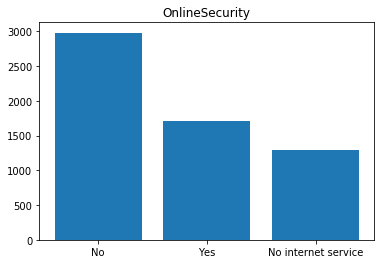

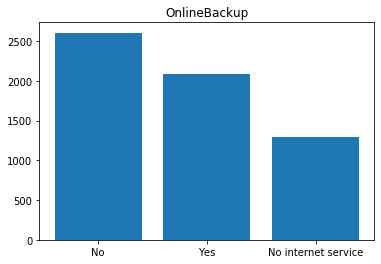

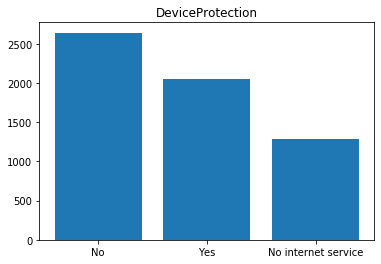

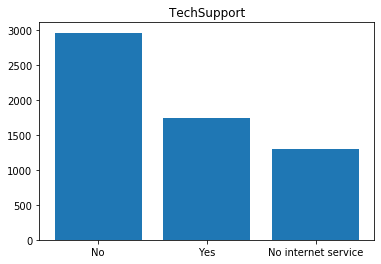

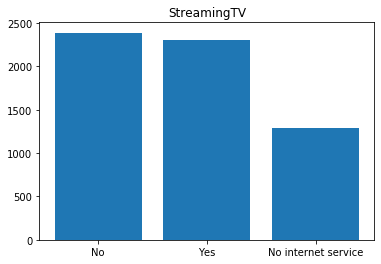

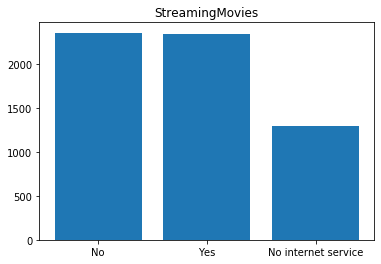

In [12]:
column_list = ['PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies']
for i in column_list:
    plt.figure(figsize=(6, 4))
    plt.bar('index', i, data=df[i].value_counts().reset_index())
    plt.title(i)

Самый популярный тип подписки-помесячная.

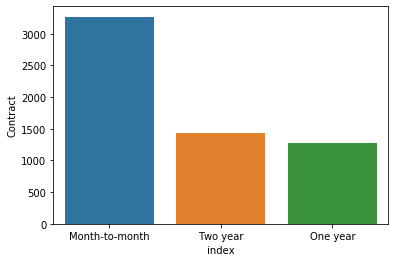

In [13]:
sns.barplot(x='index', y='Contract', data=df.Contract.value_counts().reset_index())

В основном пользуются безбумажным биллингом.

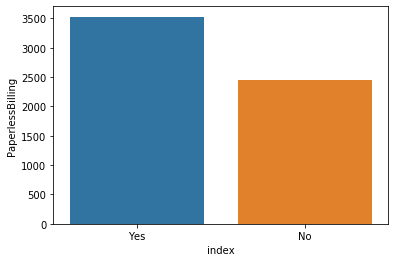

In [14]:
sns.barplot(x='index', y='PaperlessBilling', data=df.PaperlessBilling.value_counts().reset_index())

Среди способов оплаты можно выделить Electronic check, остальные способы примерно одинаковы.

[Text(0, 0, 'Electronic check'),
 Text(0, 0, 'Mailed check'),
 Text(0, 0, 'Bank transfer (automatic)'),
 Text(0, 0, 'Credit card (automatic)')]

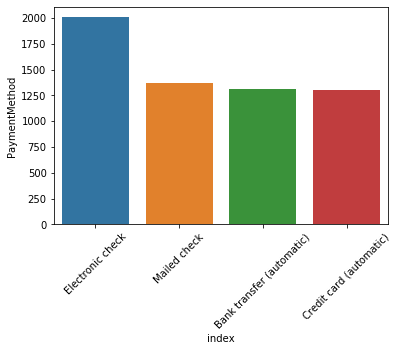

In [15]:
ax = sns.barplot(x='index', y='PaymentMethod', data=df.PaymentMethod.value_counts().reset_index())
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

В стоимости услуг которую платят пользователи можно отметить два центра: в районе 20 в месяц и более 70.

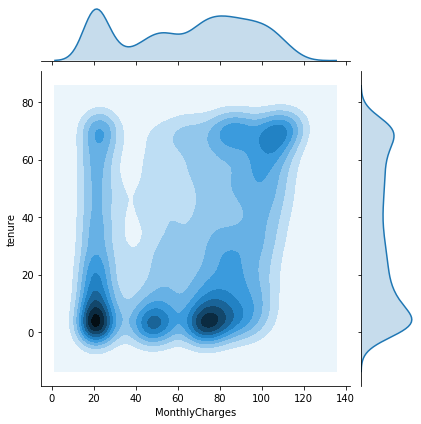

In [16]:
sns.jointplot(x='MonthlyCharges',y='tenure',data=df,kind="kde")

Преобразуем колонку TotalCharges к Float.

In [17]:
df['TotalCharges'] = pd.to_numeric(df.TotalCharges, errors='coerce')

Находим людей с не заполненным полем TotalCharges, это оказываются те "странные" пользователи с 0 месецем членства. Так как у них есть подключенные услуги, заполним поле TotalCharges предположив что это новые пользоватли, которые ещё ни разу не оплачивали услуги, и которые должны будут оплатить 1 месяц.

In [18]:
df[df.TotalCharges.isnull() == True]

,Unnamed: 0,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
356,6754,2775-SEFEE,Male,0,No,Yes,0,Yes,Yes,DSL,...,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),61.90,NaN,No
634,1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
2771,3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
3086,5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
3255,3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
4326,936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
5375,753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
5382,4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5695,488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
5951,1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No


In [19]:
df.loc[df.TotalCharges.isnull() == True, 'tenure'] = 1

In [20]:
df.loc[df.TotalCharges.isnull() == True, 'TotalCharges'] = df[df.TotalCharges.isnull() == True].MonthlyCharges

Посмотрим кто платит больше новые или старые клиенты.

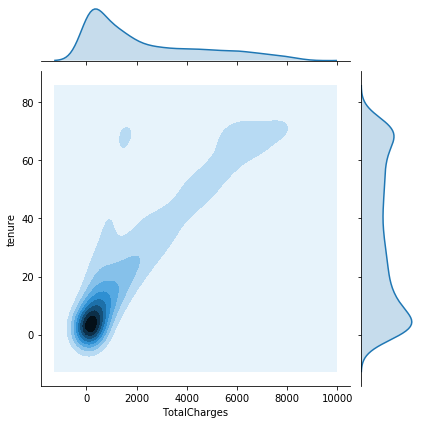

In [21]:
sns.jointplot(x='TotalCharges',y='tenure',data=df,kind="kde")

In [22]:
df.describe()

,Unnamed: 0,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,5986.000000,5986.000000,5986.000000,5986.000000,5986.000000
mean,3533.561310,0.161377,32.470431,64.802213,2294.285416
std,2035.705666,0.367909,24.514212,30.114702,2274.100395
min,0.000000,0.000000,1.000000,18.250000,18.800000
25%,1777.250000,0.000000,9.000000,35.650000,401.587500
50%,3546.500000,0.000000,29.000000,70.400000,1408.575000
75%,5291.750000,0.000000,56.000000,89.900000,3841.500000
max,7042.000000,1.000000,72.000000,118.750000,8684.800000


Количество месяцев клиентства: минимальное-1, максимальное-72, среднее-32, медиана-29.
Оплата в месяц: минимальное-18.25, максимальное-118.75, среднее-64.8, медиана-70.4.
Оплата в общем: минимальное-18.8, максимальное-8684.8, среднее-2294.29, медиана-1408.58.

# 2. Исследование зависимостей и формулирование гипотез

Из эмперического опыта предполагается, что новые пользователи уходят чаще чем старые. Докажем это найдя медеаное количество месяцев подписки среди ущедших клиентов и оставшихся

In [23]:
df.groupby(['Churn']).tenure.median()

Churn
No     37
Yes    10
Name: tenure, dtype: int64

Цена один с основополагающих факторов притягательности сервиса. Взглянем на то сколько платят разные клиенты в месяц и их срок пользования сервисом.

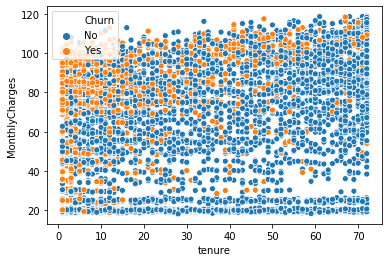

In [24]:
sns.scatterplot(x='tenure', y='MonthlyCharges' ,hue='Churn', data=df)

Как мы можем наблюдать ползователи, покинувшие сервис, зачастую платили больше в месяц при том что они пользовались сервисом не так долго.

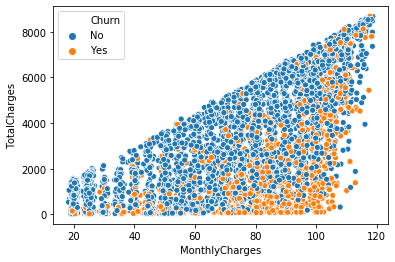

In [25]:
sns.scatterplot(x='MonthlyCharges', y='TotalCharges' ,hue='Churn', data=df)

In [26]:
df.columns

Index(['Unnamed: 0', 'customerID', 'gender', 'SeniorCitizen', 'Partner',
       'Dependents', 'tenure', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges',
       'Churn'],
      dtype='object')

Вглянем на разницу медианного значения оплаты в месяц среди оставшихся и ушедших пользователей.

In [27]:
df.groupby(['Churn'])['MonthlyCharges'].median()

Churn
No     64.75
Yes    79.50
Name: MonthlyCharges, dtype: float64

In [28]:
df.groupby(['Churn'])['MonthlyCharges'].mean()

Churn
No     61.424506
Yes    74.164871
Name: MonthlyCharges, dtype: float64

Предполагается что эту разницу можно объяснить тем что новые пользователи подписанны на множество услуг.

In [29]:
print(df.groupby(['Churn']).PhoneService.value_counts()/df.groupby(['Churn']).PhoneService.count())
print(df.groupby(['Churn'])['MultipleLines'].value_counts()/df.groupby(['Churn']).PhoneService.count())
print(df.groupby(['Churn'])['InternetService'].value_counts()/df.groupby(['Churn']).PhoneService.count())
print(df.groupby(['Churn'])['OnlineSecurity'].value_counts()/df.groupby(['Churn']).PhoneService.count())
print(df.groupby(['Churn'])['OnlineBackup'].value_counts()/df.groupby(['Churn']).PhoneService.count())
print(df.groupby(['Churn'])['DeviceProtection'].value_counts()/df.groupby(['Churn']).PhoneService.count())
print(df.groupby(['Churn'])['TechSupport'].value_counts()/df.groupby(['Churn']).PhoneService.count())
print(df.groupby(['Churn'])['StreamingTV'].value_counts()/df.groupby(['Churn']).PhoneService.count())
print(df.groupby(['Churn'])['StreamingMovies'].value_counts()/df.groupby(['Churn']).PhoneService.count())

Churn  PhoneService
No     Yes             0.899750
       No              0.100250
Yes    Yes             0.906112
       No              0.093888
Name: PhoneService, dtype: float64
Churn  MultipleLines   
No     No                  0.484883
       Yes                 0.414867
       No phone service    0.100250
Yes    Yes                 0.455577
       No                  0.450536
       No phone service    0.093888
dtype: float64
Churn  InternetService
No     DSL                0.379859
       Fiber optic        0.349170
       No                 0.270971
Yes    Fiber optic        0.687461
       DSL                0.250158
       No                 0.062382
dtype: float64
Churn  OnlineSecurity     
No     No                     0.395544
       Yes                    0.333485
       No internet service    0.270971
Yes    No                     0.782609
       Yes                    0.155009
       No internet service    0.062382
dtype: float64
Churn  OnlineBackup       
No     Yes 

Как мы видим из отношения ппользователей которые пользуются услугами ко всем пользователям. Ушедшие пользователи недополучают услуги( кроме стриминвого ТВ и кино), при этом в среднем они платят больше.

Посмотрим какой тип подписки предпочитают пользователи.

In [30]:
df.groupby(['Churn'])['Contract'].value_counts()

Churn  Contract      
No     Month-to-month    1871
       Two year          1400
       One year          1128
Yes    Month-to-month    1398
       One year           148
       Two year            41
Name: Contract, dtype: int64

Видно что пользователи которые ушли подписывались в основном помесячно.

In [31]:
df[(df.Contract == 'Month-to-month') & (df.tenure == 1)].groupby(['Churn'])['MonthlyCharges'].median()

Churn
No     30.55
Yes    69.25
Name: MonthlyCharges, dtype: float64

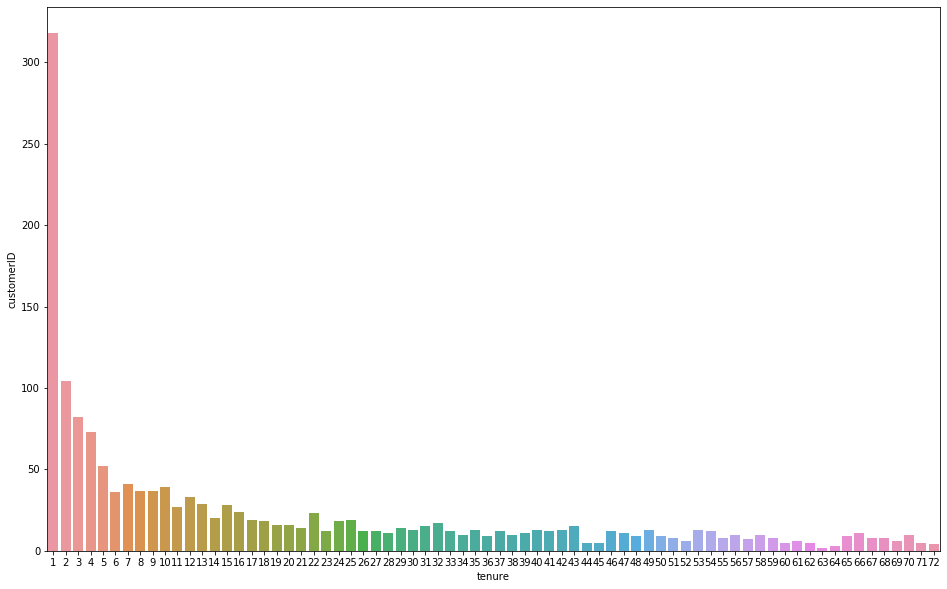

In [32]:
plt.figure(figsize=(16,10))
sns.barplot(x='tenure', y='customerID', data = df[df.Churn == 'Yes'].groupby(['tenure']).customerID.count().reset_index())

Как мы видим в основном уходят новые пользователи, в то же время платежи от этих новых пользователей в разы больше чем у пользователей которые остаются.

In [33]:
print(df[df.Contract == 'Month-to-month'].groupby(['Churn'])['MonthlyCharges'].median())
print(df[df.Contract == 'One year'].groupby(['Churn'])['MonthlyCharges'].median())
print(df[df.Contract == 'Two year'].groupby(['Churn'])['MonthlyCharges'].median())

Churn
No     65.00
Yes    78.45
Name: MonthlyCharges, dtype: float64
Churn
No     64.850
Yes    96.175
Name: MonthlyCharges, dtype: float64
Churn
No     64.125
Yes    98.300
Name: MonthlyCharges, dtype: float64


Предпологается что пользователей отпугивает высокая цена за сервис.

Преобразуем данные для более удобной работы с ними

С помощью LabelEncoder преобразуем категориальные строковые данные в численые.

In [34]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

df["gender"] = encoder.fit_transform(df["gender"])
df["Partner"] = encoder.fit_transform(df["Partner"])
df["Dependents"] = encoder.fit_transform(df["Dependents"])
df["PhoneService"] = encoder.fit_transform(df["PhoneService"])
df["MultipleLines"] = encoder.fit_transform(df["MultipleLines"])
df["InternetService"] = encoder.fit_transform(df["InternetService"])
df["OnlineSecurity"] = encoder.fit_transform(df["OnlineSecurity"])
df["OnlineBackup"] = encoder.fit_transform(df["OnlineBackup"])
df["DeviceProtection"] = encoder.fit_transform(df["DeviceProtection"])
df["TechSupport"] = encoder.fit_transform(df["TechSupport"])
df["StreamingTV"] = encoder.fit_transform(df["StreamingTV"])
df["StreamingMovies"] = encoder.fit_transform(df["StreamingMovies"])
df["Contract"] = encoder.fit_transform(df["Contract"])
df["PaperlessBilling"] = encoder.fit_transform(df["PaperlessBilling"])
df["PaymentMethod"] = encoder.fit_transform(df["PaymentMethod"])

In [35]:
df["Churn"] = encoder.fit_transform(df["Churn"])

In [36]:
df.head()

,Unnamed: 0,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1869,7010-BRBUU,1,0,1,1,72,1,2,2,...,1,1,1,1,2,0,1,24.10,1734.65,0
1,4528,9688-YGXVR,0,0,0,0,44,1,0,1,...,2,0,2,0,0,1,1,88.15,3973.20,0
2,6344,9286-DOJGF,0,1,1,0,38,1,2,1,...,0,0,0,0,0,1,0,74.95,2869.85,1
3,6739,6994-KERXL,1,0,0,0,4,1,0,0,...,0,0,0,2,0,1,2,55.90,238.50,0
4,432,2181-UAESM,1,0,0,0,2,1,0,0,...,2,0,0,0,0,0,2,53.45,119.50,0


Удалим не нужные колонки.

In [37]:
df = df.drop(['Unnamed: 0', 'customerID'], axis=1)

Построим матрицу кореляций признаков.

In [38]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
gender,1,-0.00744733,-0.00779137,0.00908269,0.00321991,-0.00491257,0.000654401,-0.00185768,-0.0207592,-0.0180448,-0.00301043,-0.00846832,-0.00819273,-0.00729691,-0.00184313,-0.0139895,0.0157446,-0.014286,-0.0036672,-0.00954815
SeniorCitizen,-0.00744733,1,0.0148673,-0.214233,0.00543851,0.00946405,0.135743,-0.0336139,-0.127915,-0.0174604,-0.0199112,-0.152474,0.0268687,0.0429401,-0.149406,0.155691,-0.0376532,0.219387,0.0937969,0.150097
Partner,-0.00779137,0.0148673,1,0.449029,0.382053,0.0249263,0.14791,0.00631926,0.161958,0.162627,0.165875,0.133171,0.143919,0.134082,0.300549,-0.0180368,-0.151566,0.104006,0.321375,-0.14684
Dependents,0.00908269,-0.214233,0.449029,1,0.163829,-0.000579052,-0.02318,0.0467192,0.158121,0.0906802,0.077105,0.139518,0.0460746,0.0239284,0.246163,-0.112405,-0.0383025,-0.115803,0.062736,-0.160204
tenure,0.00321991,0.00543851,0.382053,0.163829,1,0.0103702,0.350519,-0.0301563,0.328217,0.36721,0.37248,0.326142,0.293024,0.307449,0.671709,0.00652948,-0.359644,0.256946,0.827747,-0.34854
PhoneService,-0.00491257,0.00946405,0.0249263,-0.000579052,0.0103702,1,-0.0174788,0.390024,-0.0111304,0.0274936,0.00276366,-0.0121892,0.0555817,0.0470351,0.00526677,0.0213397,-0.00385277,0.251029,0.117151,0.00942133
MultipleLines,0.000654401,0.135743,0.14791,-0.02318,0.350519,-0.0174788,1,-0.106981,0.0125819,0.125375,0.126047,0.0150517,0.17089,0.184659,0.113906,0.169703,-0.176295,0.436869,0.458822,0.0349428
InternetService,-0.00185768,-0.0336139,0.00631926,0.0467192,-0.0301563,0.390024,-0.106981,1,-0.0233631,0.0326646,0.044264,-0.021814,0.105667,0.0919925,0.100796,-0.137651,0.089963,-0.320206,-0.173635,-0.0471975
OnlineSecurity,-0.0207592,-0.127915,0.161958,0.158121,0.328217,-0.0111304,0.0125819,-0.0233631,1,0.187753,0.186062,0.283037,0.0586677,0.0691888,0.37406,-0.150102,-0.0891262,-0.0449474,0.258598,-0.290306
OnlineBackup,-0.0180448,-0.0174604,0.162627,0.0906802,0.36721,0.0274936,0.125375,0.0326646,0.187753,1,0.191779,0.189077,0.148079,0.146281,0.279856,-0.0163627,-0.1187,0.12697,0.372418,-0.193851


# 3. Построение моделей для прогнозирования оттока

Как было выясненно ранее ушедшие пользователи похожи между собой. Большинством сервисов они пользуются меньше, стриминговым ТВ и кино больше, они платят больше и остаются на платформе не так долго. Считаю логичным попытаться поискать похожих пользователей с помощью kNN или найти "правила" по которым определяется пользователь, собирающийся уходить, с помощью DecisionTree (подразумевается использование более сложных моделей основаных на DecisionTree, таких как RandomForest). Стоит заметить, что стандартные методы ML, такие как DecisionTree и LogisticRegression, имеют тенденцию к отклонению от класса большинства и склонны игнорировать класс меньшинства. Собственно покажем это.

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier

Разделяем выборку на тренировочные и тестовые данные.

In [40]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(['Churn'], axis=1),
                                                   df.Churn, test_size=0.3,
                                                   random_state=17)

In [ ]:
rfr = RandomForestClassifier(n_estimators=5000).fit(X_train, y_train)

In [ ]:
report= classification_report(y_test, rfr.predict(X_test), target_names=['No', 'Yes'],  digits=3)

In [ ]:
print(report)

In [44]:
from sklearn.neighbors import KNeighborsClassifier
rfr = KNeighborsClassifier().fit(X_train, y_train)
report= classification_report(y_test, rfr.predict(X_test), target_names=['No', 'Yes'],  digits=3)
print(report)

              precision    recall  f1-score   support

          No      0.816     0.898     0.855      1332
         Yes      0.588     0.418     0.489       464

    accuracy                          0.774      1796
   macro avg      0.702     0.658     0.672      1796
weighted avg      0.757     0.774     0.760      1796



In [136]:
from sklearn.linear_model import LogisticRegression
rfr = LogisticRegression().fit(X_train, y_train)
report= classification_report(y_test, rfr.predict(X_test), target_names=['No', 'Yes'],  digits=3)
print(report)

              precision    recall  f1-score   support

          No      0.838     0.892     0.864      1332
         Yes      0.620     0.506     0.558       464

    accuracy                          0.792      1796
   macro avg      0.729     0.699     0.711      1796
weighted avg      0.782     0.792     0.785      1796



/home/veilas/anaconda3/envs/myml/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Как мы видим все три алгоритма обучились определять один класс намного лучше другого в следствии несбалансированности датасета.

Я предлагаю сгенерировать данные с помощью алгорима SMOTE. Для начала установим библиотеку.

In [46]:
!pip install imblearn

In [47]:
from imblearn.over_sampling import SMOTE

Using TensorFlow backend.


Сгенерируем дополнительные данные, чтобы сбалансировать датасет.

In [48]:
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_train, y_train)

In [49]:
print(X_train.shape)
print(X_res.shape)

(4190, 19)
(6134, 19)


Смотрим результат по 3 выбранным алгоритмам, Recall увеличился, но только для класса 'Yes', соответсвенно уменьшилось число false negative ошибок.

In [138]:
rfr = LogisticRegression().fit(X_res, y_res)
report= classification_report(y_test, rfr.predict(X_test), target_names=['No', 'Yes'],  digits=3)
print(report)

              precision    recall  f1-score   support

          No      0.868     0.773     0.818      1332
         Yes      0.504     0.664     0.573       464

    accuracy                          0.744      1796
   macro avg      0.686     0.718     0.695      1796
weighted avg      0.774     0.744     0.754      1796



/home/veilas/anaconda3/envs/myml/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [51]:
rfr = KNeighborsClassifier().fit(X_res, y_res)
report= classification_report(y_test, rfr.predict(X_test), target_names=['No', 'Yes'],  digits=3)
print(report)

              precision    recall  f1-score   support

          No      0.858     0.729     0.788      1332
         Yes      0.456     0.653     0.537       464

    accuracy                          0.709      1796
   macro avg      0.657     0.691     0.663      1796
weighted avg      0.754     0.709     0.723      1796



In [52]:
rfr = RandomForestClassifier().fit(X_res, y_res)
report= classification_report(y_test, rfr.predict(X_test), target_names=['No', 'Yes'],  digits=3)
print(report)

              precision    recall  f1-score   support

          No      0.851     0.854     0.852      1332
         Yes      0.576     0.571     0.574       464

    accuracy                          0.781      1796
   macro avg      0.714     0.712     0.713      1796
weighted avg      0.780     0.781     0.780      1796



Посмотрим на разпределение полной оплаты в датасете. Заметим отрицательное биномиальное распределение.

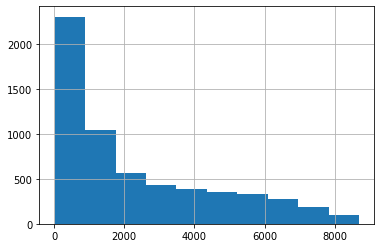

In [58]:
df.TotalCharges.hist()

In [60]:
df1 = df.copy()

Логарифмируем TotalCharges дабы избавиться от сильного хвоста.

In [61]:
import numpy as np
df1.TotalCharges = np.log1p(df1.TotalCharges)

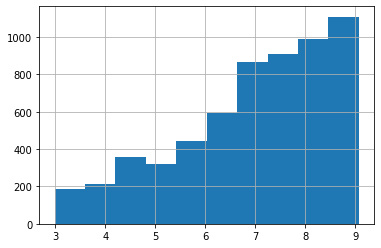

In [68]:
df1.TotalCharges.hist()

Делим датасет на тренировочную и тестовую часть.

In [62]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(df1.drop(['Churn'], axis=1),
                                                   df1.Churn, test_size=0.3,
                                                   random_state=17)

Обучаем выбранные алгоритмы на изменненых данных.

In [63]:
rfr = RandomForestClassifier().fit(X_train1, y_train1)
report= classification_report(y_test1, rfr.predict(X_test1), target_names=['No', 'Yes'],  digits=3)
print(report)

              precision    recall  f1-score   support

          No      0.826     0.906     0.864      1332
         Yes      0.627     0.453     0.526       464

    accuracy                          0.789      1796
   macro avg      0.727     0.679     0.695      1796
weighted avg      0.775     0.789     0.777      1796



In [64]:
rfr = LogisticRegression().fit(X_train1, y_train1)
report= classification_report(y_test1, rfr.predict(X_test1), target_names=['No', 'Yes'],  digits=3)
print(report)

              precision    recall  f1-score   support

          No      0.840     0.911     0.874      1332
         Yes      0.663     0.500     0.570       464

    accuracy                          0.805      1796
   macro avg      0.751     0.706     0.722      1796
weighted avg      0.794     0.805     0.795      1796



/home/veilas/anaconda3/envs/myml/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [133]:
rfr = KNeighborsClassifier().fit(X_train1, y_train1)
report= classification_report(y_test1, rfr.predict(X_test1), target_names=['No', 'Yes'],  digits=3)
print(report)

              precision    recall  f1-score   support

          No      0.836     0.881     0.858      1332
         Yes      0.596     0.502     0.545       464

    accuracy                          0.783      1796
   macro avg      0.716     0.692     0.701      1796
weighted avg      0.774     0.783     0.777      1796



Пробуем изменённый датасет с генерацией данных.

In [65]:
sm = SMOTE(random_state=42)
X_res1, y_res1 = sm.fit_resample(X_train1, y_train1)

In [66]:
rfr = RandomForestClassifier().fit(X_res1, y_res1)
report= classification_report(y_test1, rfr.predict(X_test1), target_names=['No', 'Yes'],  digits=3)
print(report)

              precision    recall  f1-score   support

          No      0.852     0.845     0.848      1332
         Yes      0.564     0.578     0.571       464

    accuracy                          0.776      1796
   macro avg      0.708     0.711     0.709      1796
weighted avg      0.777     0.776     0.776      1796



In [140]:
rfr = KNeighborsClassifier().fit(X_res1, y_res1)
report= classification_report(y_test1, rfr.predict(X_test1), target_names=['No', 'Yes'],  digits=3)
print(report)

              precision    recall  f1-score   support

          No      0.883     0.715     0.791      1332
         Yes      0.471     0.728     0.572       464

    accuracy                          0.719      1796
   macro avg      0.677     0.722     0.681      1796
weighted avg      0.777     0.719     0.734      1796



In [67]:
rfr = LogisticRegression().fit(X_res1, y_res1)
report= classification_report(y_test1, rfr.predict(X_test1), target_names=['No', 'Yes'],  digits=3)
print(report)

              precision    recall  f1-score   support

          No      0.877     0.758     0.813      1332
         Yes      0.500     0.696     0.582       464

    accuracy                          0.742      1796
   macro avg      0.689     0.727     0.698      1796
weighted avg      0.780     0.742     0.753      1796



/home/veilas/anaconda3/envs/myml/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Попробуем стэкинг.

In [82]:
def stacking(models, meta_alg, data_train, targets_train, data_test, targets_test=None, random_state=None, test_size=None, cv=5):
    if test_size is None:
        meta_mtrx = np.empty((data_train.shape[0], len(models)))
        skf = StratifiedKFold(n_splits=5).get_n_splits(data_train, targets_train)
        for n, model in enumerate(models):
            meta_mtrx[:,n] = cross_val_predict(model, data_train,
                                               targets_train, cv = skf, method='predict')
            model = model.fit(data_train, targets_train)
        
        meta_model = meta_alg.fit(meta_mtrx, targets_train)
        
        meta_mtrx_test = np.empty((data_test.shape[0], len(models)))
        for n, model in enumerate(models):
            meta_mtrx_test[:,n] = model.predict(data_test)
        
        prediction= meta_model.predict(meta_mtrx_test)
        
        if targets_test is not None:
            report= classification_report(targets_test, prediction, target_names=['No', 'Yes'],  digits=3)
            print(report)
            #print('Roc_auc', roc_auc_score(targets_test, prediction))
    
    elif test_size < 0 or test_size > 1:
        print('test_size must be between 0 and 1')
    
    else:
        train, valid, train_true, valid_true = train_test_split(data_train,
                                                                targets_train,
                                                               test_size=test_size)
        meta_mtrx = np.empty((valid.shape[0], len(models)))
        for n, model in enumerate(models):
            model = model.fit(train, train_true)
            meta_mtrx[:,n] = model.predict(valid)
            
        meta_model = meta_alg.fit(meta_mtrx, valid_true)
        
        meta_mtrx_test = np.empty((data_test.shape[0], len(models)))
        for n, model in enumerate(models):
            meta_mtrx_test[:,n] = model.predict(data_test)
        
        prediction= meta_model.predict(meta_mtrx_test)
        
        if targets_test is not None:
            report= classification_report(targets_test, prediction, target_names=['No', 'Yes'],  digits=3)
            print(report)
            #print('Roc_auc', roc_auc_score(targets_test, prediction))

In [83]:
knn = KNeighborsClassifier(n_neighbors=3)
lr = LogisticRegression(random_state=17)
rfc = RandomForestClassifier(random_state=17)

meta = XGBClassifier(n_estimators=100)

Без генерации данных.

In [87]:
stacking(models=[knn, lr, rfc], meta_alg=meta, data_train= X_train1,
         targets_train=y_train1,
        data_test= X_test1, targets_test=y_test1, random_state=42, test_size=0.3)

/home/veilas/anaconda3/envs/myml/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


              precision    recall  f1-score   support

          No      0.843     0.904     0.872      1332
         Yes      0.651     0.515     0.575       464

    accuracy                          0.803      1796
   macro avg      0.747     0.709     0.724      1796
weighted avg      0.793     0.803     0.795      1796



С генерацией данных.

In [120]:
stacking(models=[knn, lr, rfc], meta_alg=meta, data_train= X_res1,
         targets_train=y_res1,
        data_test= X_test1, targets_test=y_test1, random_state=42, test_size=0.3)

/home/veilas/anaconda3/envs/myml/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


              precision    recall  f1-score   support

          No      0.855     0.830     0.842      1332
         Yes      0.550     0.597     0.572       464

    accuracy                          0.769      1796
   macro avg      0.702     0.713     0.707      1796
weighted avg      0.776     0.769     0.772      1796



Так же хорошей идей может быть попробовать XGBoost, так как иногда он работает лучше других алгоритмов.

In [98]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

clf = XGBClassifier()
parameters = {
     "eta"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
     "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
     "min_child_weight" : [ 1, 3, 5, 7 ],
     "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ]
     }

grid = GridSearchCV(clf,
                    parameters, n_jobs=-1, scoring='f1_weighted',
                    cv=5)

grid.fit(X_train1, y_train1)

GridSearchCV(cv=5, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='deprecated', n_jobs=-1,
             param_grid={'eta': [0.05, 0.1, 0.15, 0.2, 0.25, 0.3],
                         'gamma': [0.0, 0.1, 0.2, 0.3, 0.4],
                         'max_depth': [3, 4, 5, 6, 

In [99]:
report= classification_report(y_test1, grid.predict(X_test1), target_names=['No', 'Yes'],  digits=3)
print(report)

              precision    recall  f1-score   support

          No      0.837     0.911     0.872      1332
         Yes      0.658     0.489     0.561       464

    accuracy                          0.802      1796
   macro avg      0.747     0.700     0.717      1796
weighted avg      0.790     0.802     0.792      1796



# 4. Сравнение качества моделей 

Важно отметить что при не сбалансированном датасете не следует использовать accuracy как метрику. Считаю что целесообразно использовать Recall(так как ошибки второго рода в данном случае более актуальны) и F1-score, но в анализе я также приведу значение accuracy.  
Прорезюмируем результаты полученные из экспериментов:  
1) Неизменённый датасет:  
    RandomForest: Accuracy-0.783, Recall-  0.783, F1-score - 0.771  
    KNeighbors: Accuracy-0.774, Recall- 0.774, F1-score - 0.760  
    LogisticRegression: Accuracy-0.792, Recall- 0.792, F1-score - 0.785  
2) Датасет с использованием алгоритма генерации SMOTE:  
    RandomForest: Accuracy-0.744, Recall- 0.744, F1-score - 0.780  
    KNeighbors: Accuracy-0.709, Recall- 0.709, F1-score - 0.725  
    LogisticRegression: Accuracy-0.781, Recall- 0.781, F1-score - 0.755  
3) Датасет с использованием логарифмизации TotalCharges:  
    RandomForest: Accuracy-0.789, Recall- 0.789, F1-score - 0.795  
    KNeighbors: Accuracy-0.783, Recall- 0.783, F1-score - 0.777  
    LogisticRegression: Accuracy-0.805, Recall- 0.805, F1-score - 0.777  
4) Датасет с использованием логарифмизации TotalCharges и генерацией данных:  
    RandomForest: Accuracy-0.776, Recall- 0.776, F1-score - 0.776  
    KNeighbors: Accuracy-0.719, Recall- 0.719, F1-score - 0.734  
    LogisticRegression: Accuracy-0.742, Recall- 0.742, F1-score - 0.753  
5) Датасет с использованием логарифмизации TotalCharges и Стэкинг:  
    Stack: Accuracy-0.803, Recall- 0.803, F1-score - 0.795  
6) Датасет с использованием логарифмизации TotalCharges и генерацией данных, и Стэкинг:  
    Stack: Accuracy-0.769, Recall- 0.769, F1-score - 0.772  
7) Датасет с использованием логарифмизации TotalCharges и XGBoost:  
    Stack: Accuracy-0.802, Recall- 0.802, F1-score - 0.792  

В общем лучше всего себя показал датасет с использованием логарифмизации TotalCharges и Стэкинг, хочется отметить что с ощибками второго рода дла класса "Yes" очень хорошо справляется KNeighbors c датасетом с использованием логарифмизации TotalCharges и генерацией данных.

Так же за кулисами осталось использование MinMaxScaler, но результатов это не дало (Идея была в том, что признак TotalCharges, очень сильно отличается от остальных признаков и имеет наибольшее влияние на таргет).

Сгласно проведенному анализу, компании следует большее внимание уделять новым пользователям, в оссобенности к тем кто платит сервису больше чем средняя оплата среди старых пользователей. Рекомендуется устраивать скидки для первой подписки, а так же привлекать пользователей на планы отпаты длиной больше месяца различными скидками, это дасть людям время привыкнуть к сервису и в последствии уменьшит отток.